# Dull Razor

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
src = plt.imread(r'F:\TUhh\Sem 5\Project\practice\train2.jpg')
src=cv2.resize(src,(500,500))
print( src.shape )


In [ ]:
plt.imshow(src )
plt.show()

In [ ]:
# Convert the original image to grayscale
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )
plt.imshow(grayScale)
plt.show()
#cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

In [ ]:
# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

In [ ]:
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat)
plt.show()
#cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

In [ ]:
print(blackhat)

In [ ]:
# intensify the hair countours in preparation for the inpainting 
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
thresh3 = cv2.adaptiveThreshold(blackhat,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) # Adaptive gaussian
thresh4 = cv2.adaptiveThreshold(blackhat,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) # Adaptive gaussian
print( thresh2.shape )
plt.imshow(thresh2)
plt.show()
#cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

In [ ]:
# inpaint the original image depending on the mask
dst = cv2.inpaint(src,thresh2,10,cv2.INPAINT_TELEA)
#adMean = cv2.inpaint(src,thresh3,1,cv2.INPAINT_TELEA)
#adGaus = cv2.inpaint(src,thresh4,3,cv2.INPAINT_TELEA)
plt.imshow(dst)
plt.show()
#cv2.imwrite('C:\\SkinHairRemovalPython\\InPainted_sample1.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

In [ ]:
plt.imshow(adMean)
plt.show()

In [ ]:
plt.imshow(adGaus)
plt.show()

# Bandaid Detection

# Circle detection

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

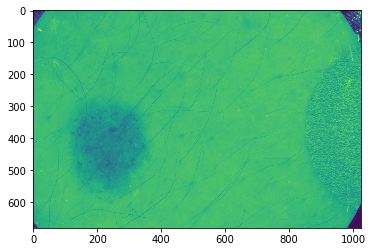

In [25]:
imPath=r'F:\TUhh\Sem 5\Project\practice\circ3.jpg'
im = cv2.imread(imPath)
gray =cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

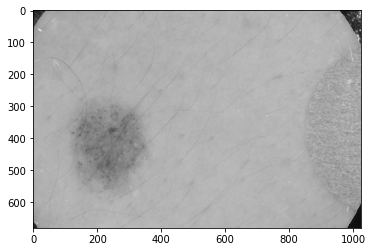

In [26]:
img = cv2.medianBlur(gray,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
plt.imshow(cimg)
plt.show()

In [27]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
param1=20,param2=50,minRadius=90,maxRadius=150)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Template Matching

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread(r'F:\TUhh\Sem 5\Project\practice\circ2.jpg',0)
img2 = img.copy()
template = cv2.imread(r'F:\TUhh\Sem 5\Project\practice\temp1.jpg',0)

In [ ]:
w, h = template.shape[::-1]
meth='cv2.TM_SQDIFF'
method=eval(meth)
res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)
plt.show()

# Histograms

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

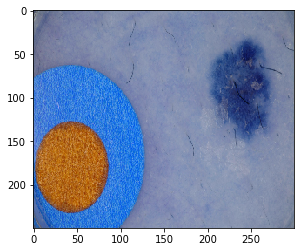

In [17]:
image = cv2.imread(r'F:\TUhh\Sem 5\Project\practice\circ1.jpg')
im= cv2.resize(image,(300,250))
gry=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(im)
plt.show()

In [19]:
output=r'F:\TUhh\Sem 5\Project\practice\test.csv'
outIm=np.asarray(gry)
outIm

array([[107,  98, 106, ..., 116, 118, 119],
       [106,  94,  94, ..., 116, 118, 122],
       [107,  89, 103, ..., 114, 116, 123],
       ...,
       [ 94,  92, 101, ..., 132, 130, 132],
       [ 90,  91,  97, ..., 133, 131, 126],
       [ 89,  94,  95, ..., 130, 130, 124]], dtype=uint8)

In [20]:
np.savetxt(output,outIm)

In [12]:
gry

array([[107,  98, 106, ..., 116, 118, 119],
       [106,  94,  94, ..., 116, 118, 122],
       [107,  89, 103, ..., 114, 116, 123],
       ...,
       [ 94,  92, 101, ..., 132, 130, 132],
       [ 90,  91,  97, ..., 133, 131, 126],
       [ 89,  94,  95, ..., 130, 130, 124]], dtype=uint8)

In [13]:
gry.shape

(250, 300)

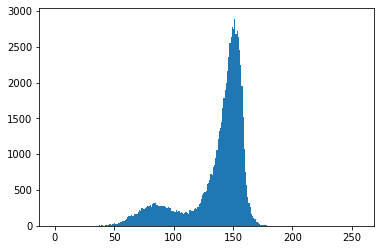

In [16]:
plt.hist(gry.ravel(),256,[0,256])
plt.show()

# Color Masking

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

In [2]:
impath = r'F:\TUhh\Sem 5\Project\practice\circ1.jpg'
img = cv2.imread(impath)

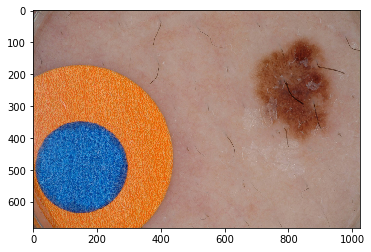

In [3]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [17]:
img.shape

(682, 1024, 3)

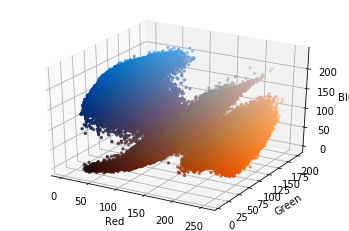

In [4]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [5]:
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [6]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [7]:
# HSV seperation

In [8]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

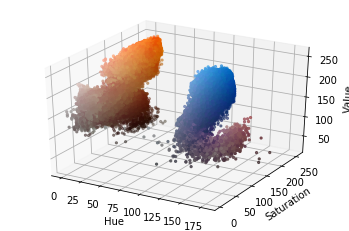

In [9]:
h, s, v = cv2.split(hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [10]:
light_orange = (1, 100, 170)
dark_orange = (18, 255, 255)
light_blue = (50, 50, 75)
dark_blue = (150, 250, 250)

178


In [36]:
template = np.ones((682,1024))
template = template.astype(int)

a = r.flatten()
counts = np.bincount(a)
r_max = np.argmax(counts)

a = g.flatten()
counts = np.bincount(a) 
g_max = np.argmax(counts)

a = b.flatten()
counts = np.bincount(a)
b_max = np.argmax(counts)

rn = template*r_max
gn = template*g_max
bn = template*b_max
skin = np.dstack([rn, gn, bn])

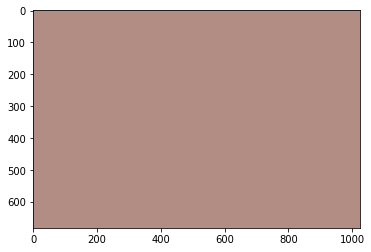

In [37]:
plt.imshow(skin)
plt.show()

In [38]:
mask = cv2.inRange(hsv, light_orange, dark_orange)
mask1 = cv2.inRange(hsv, light_blue, dark_blue)
mask.shape

(682, 1024)

In [39]:
result = cv2.bitwise_and(img, img, mask=mask1)

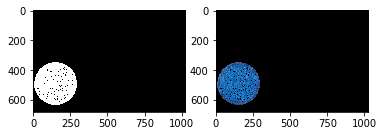

In [40]:
plt.subplot(1, 2, 1)
plt.imshow(mask1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [41]:
masker=cv2.bitwise_not(mask)
m1=cv2.bitwise_not(mask1)

In [42]:
# replace the sticker with black
imnew = cv2.bitwise_and(img,img,mask=masker)
imnew = cv2.bitwise_and(imnew,imnew,mask=m1)

In [66]:
skinPatch = cv2.bitwise_and(skin,skin,mask = mask)
skinPatch1 = cv2.bitwise_and(skin,skin,mask = mask1)

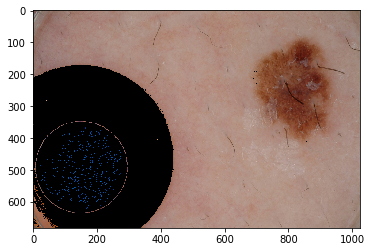

In [67]:
plt.imshow(imnew)
plt.show()

In [68]:
type(skinPatch)

numpy.ndarray

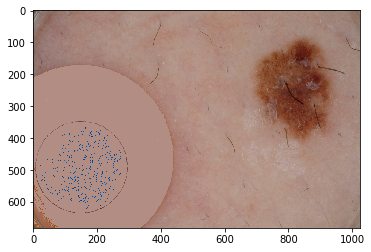

In [69]:
rst = cv2.add(imnew,skinPatch,dtype=cv2.CV_64F)
rst = cv2.add(rst,skinPatch1,dtype=cv2.CV_64F)
rst = rst.astype(int)
plt.imshow(rst)
plt.show()

In [132]:
type(hsv)

numpy.ndarray

In [134]:
h1= np.multiply(h,masker)
s1=np.multiply(s,masker)
v1= np.multiply(v,masker)

In [135]:
hsv1 = np.dstack([h1, s1, v1])

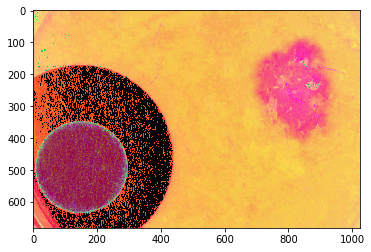

In [136]:
plt.imshow(hsv1)
plt.show()

In [139]:
r1= np.multiply(r,masker)
g1=np.multiply(g,masker)
b1= np.multiply(b,masker)
rgb1 = np.dstack([r1, g1, b1])

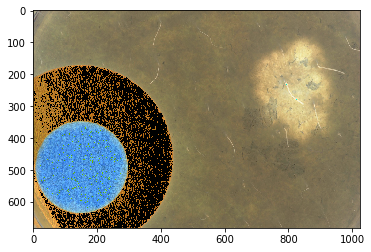

In [143]:
im=cv2.cvtColor(rgb1,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

array([[[157, 153, 134],
        [158, 154, 136],
        [159, 155, 137],
        ...,
        [160, 143, 124],
        [159, 142, 121],
        [157, 141, 118]],

       [[158, 152, 133],
        [159, 153, 134],
        [162, 155, 138],
        ...,
        [159, 142, 123],
        [158, 141, 120],
        [157, 141, 118]],

       [[159, 154, 133],
        [159, 153, 134],
        [162, 156, 137],
        ...,
        [157, 139, 122],
        [156, 139, 120],
        [156, 139, 118]],

       ...,

       [[187, 177, 147],
        [188, 174, 145],
        [190, 175, 142],
        ...,
        [141, 134, 117],
        [143, 136, 117],
        [145, 136, 116]],

       [[180, 174, 151],
        [185, 174, 147],
        [191, 176, 143],
        ...,
        [143, 135, 118],
        [144, 137, 118],
        [143, 134, 114]],

       [[179, 173, 150],
        [184, 173, 146],
        [188, 173, 140],
        ...,
        [144, 136, 119],
        [144, 137, 118],
        [143, 134, 114]]

array([[134, 136, 137, ..., 124, 121, 118],
       [133, 134, 138, ..., 123, 120, 118],
       [133, 134, 137, ..., 122, 120, 118],
       ...,
       [147, 145, 142, ..., 117, 117, 116],
       [151, 147, 143, ..., 118, 118, 114],
       [150, 146, 140, ..., 119, 118, 114]], dtype=uint8)

array([[134, 136, 137, ..., 124, 121, 118],
       [133, 134, 138, ..., 123, 120, 118],
       [133, 134, 137, ..., 122, 120, 118],
       ...,
       [147, 145, 142, ..., 117, 117, 116],
       [151, 147, 143, ..., 118, 118, 114],
       [150, 146, 140, ..., 119, 118, 114]], dtype=uint8)